## Power Transform

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [39]:
# importing the demo data
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
df.shape

(1030, 9)

We want to predict the strength - Regression Problem

In [41]:
df.isnull().sum()
# we got nothing missing!!

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [42]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [43]:
# separate inpput and output
x = df.drop(columns=['Strength'])
y = df['Strength']

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# Applying wihout any Trnasformation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6275531792314853

In [58]:
# cross validatioin
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, x, y, scoring='r2'))
# we actually get a worse score

0.46099404916628633

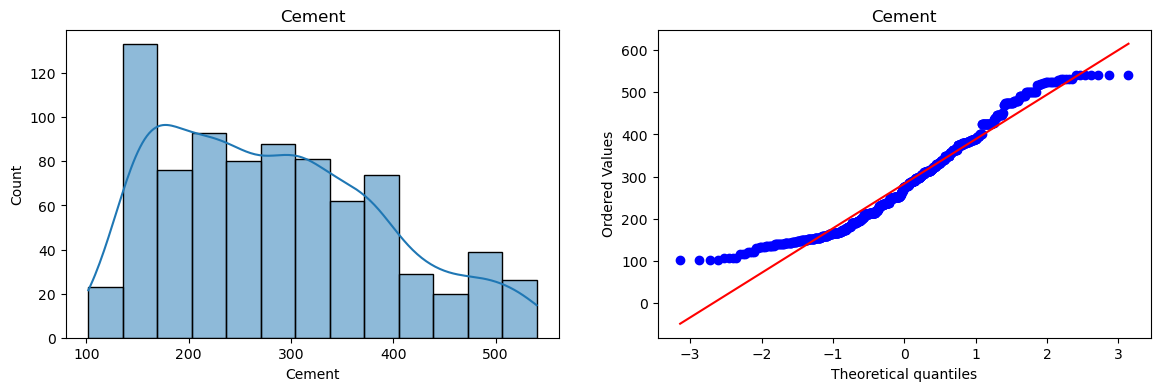

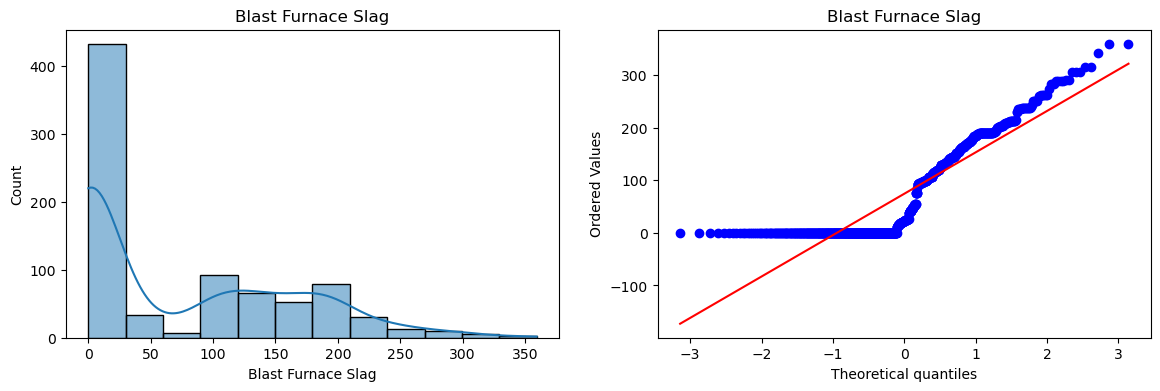

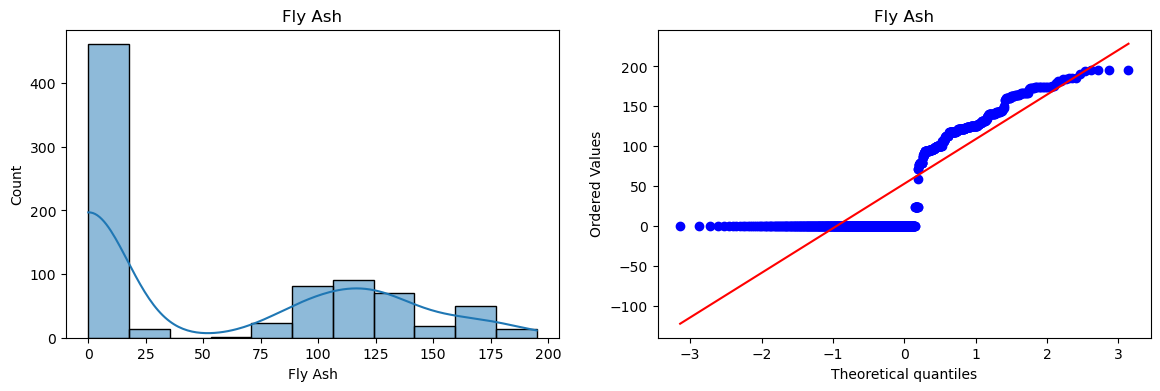

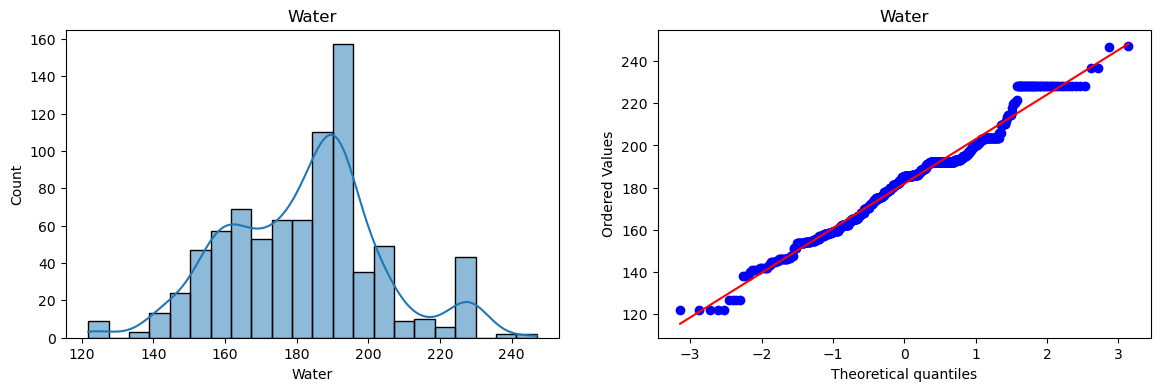

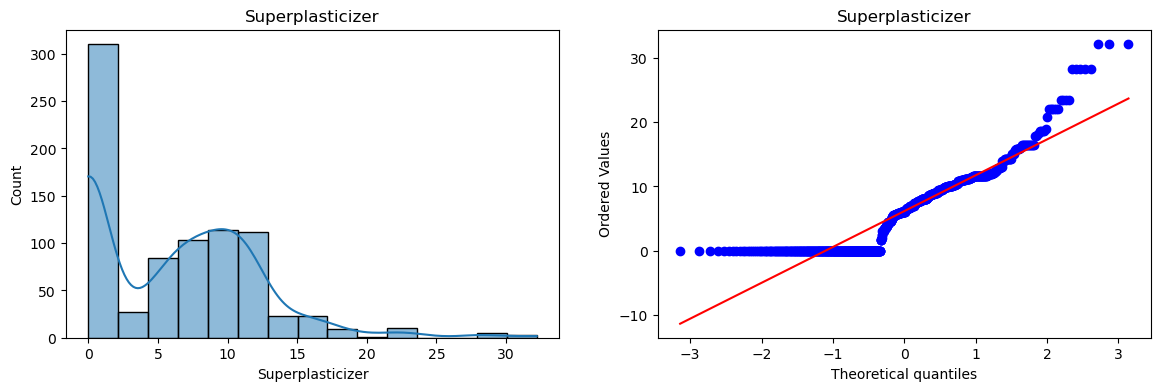

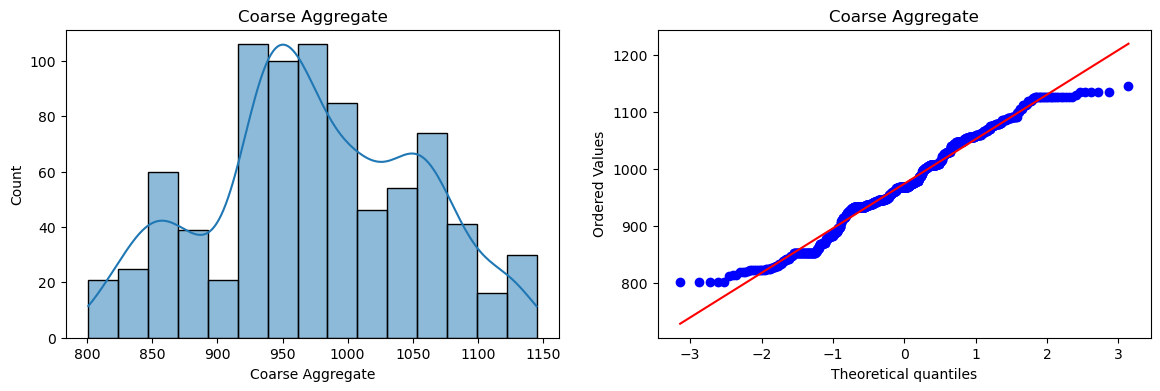

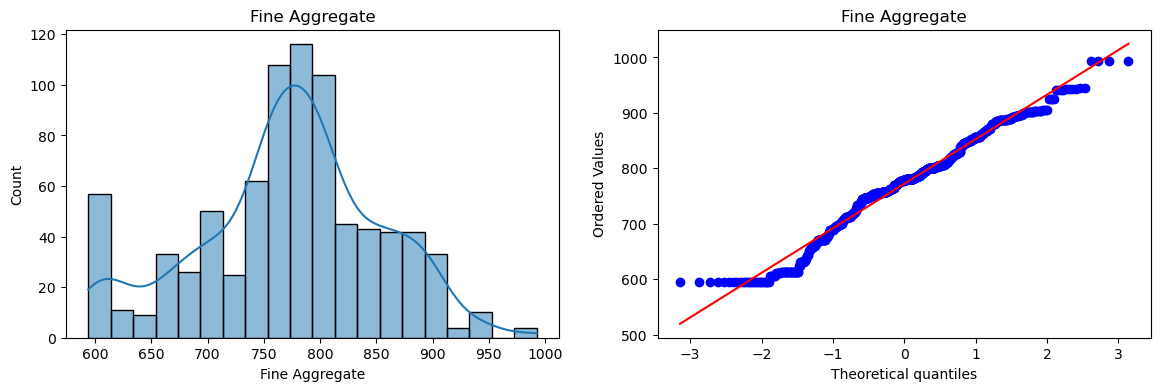

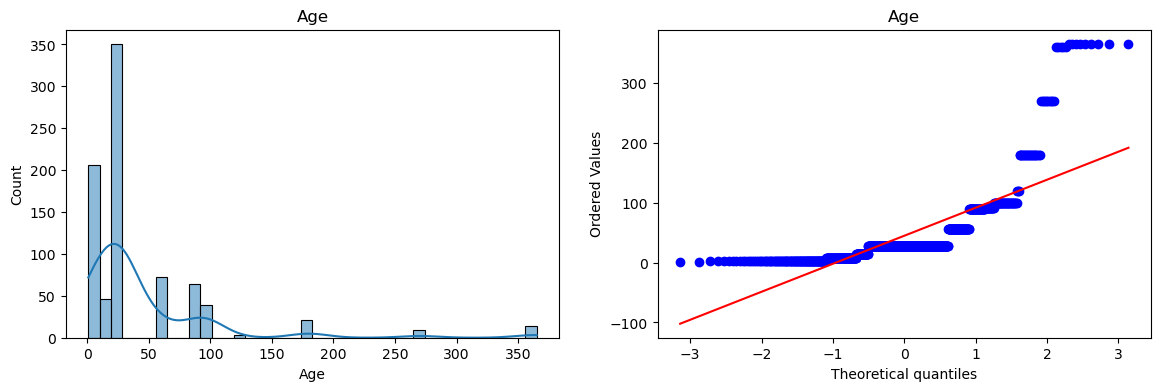

In [59]:
# plotting the distplots wihout transforms

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()

Note that some of them are really not Normal Distribution....

### Applying Box-Cox Transform

In [60]:
# import the power transformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+0.0000001)
x_test_transformed = pt.fit_transform(x_test+0.0000001)

pd.DataFrame({'cols': x_train.columns, 'box_cox_lambda': pt.lambdas_})
# pt.lambdas_ is a data member which holds all the result lambda values

,cols,box_cox_lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.023556
2,Fly Ash,-0.005774
3,Water,0.959062
4,Superplasticizer,0.091027
5,Coarse Aggregate,1.192491
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [49]:
# re train with the transformed data
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)

y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test, y_pred2)
# we have an improvement over the untransformed

0.8050550268146687

In [50]:
# cross validating this
pt = PowerTransformer()
x_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed, y, scoring='r2'))
# well a little improvement if you cross verify

0.6834625147585043

In [51]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
# changing the numpy array into a dataframe

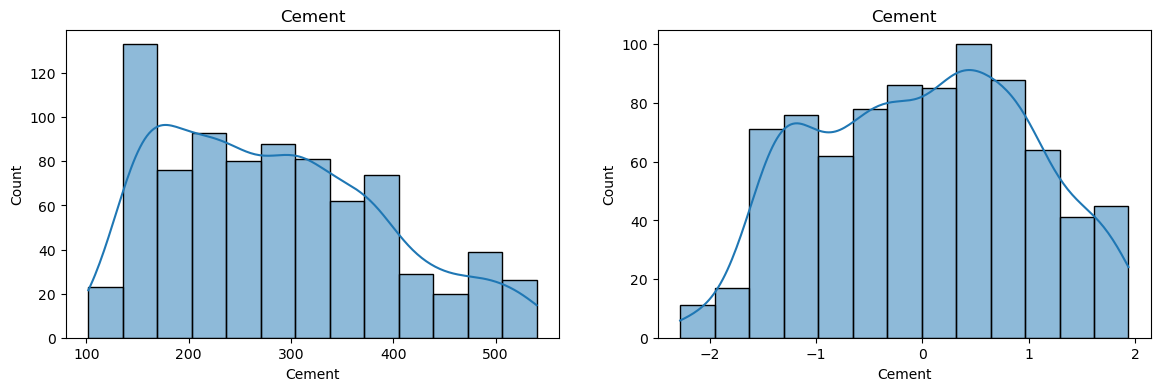

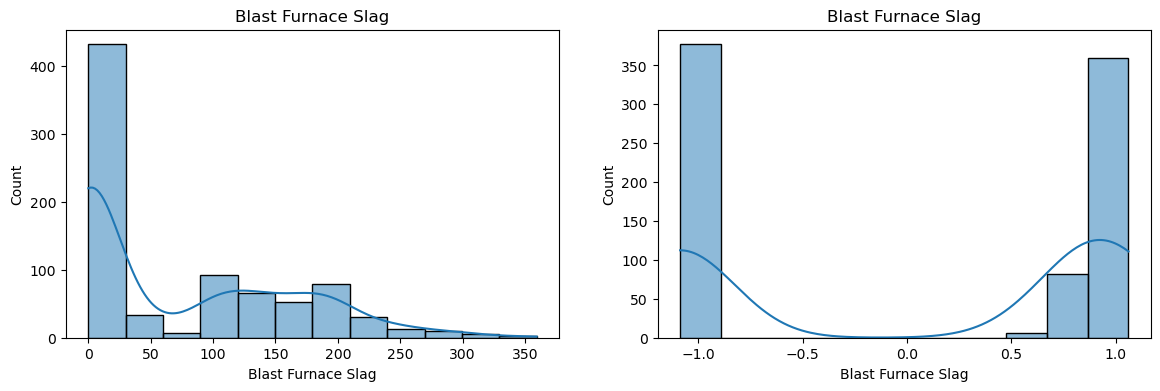

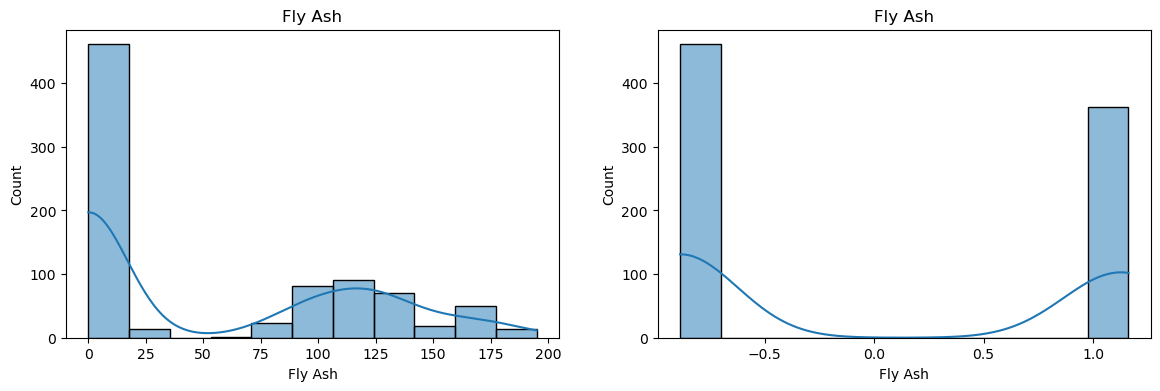

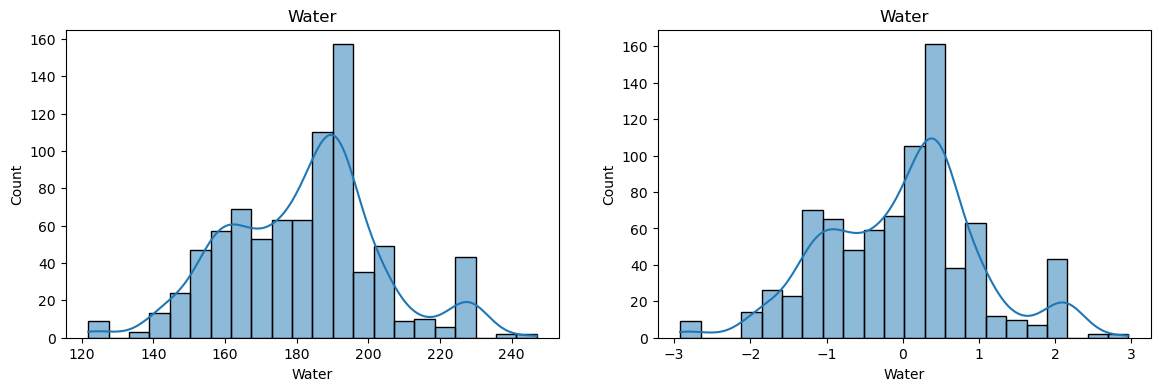

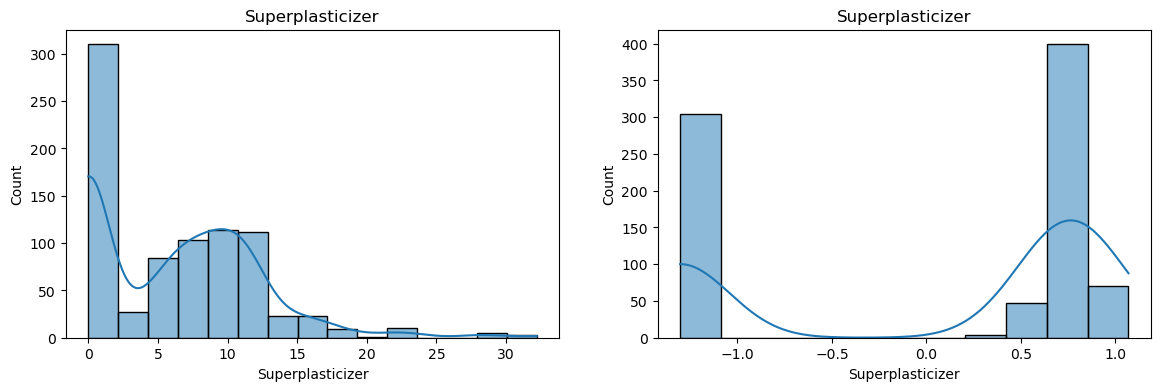

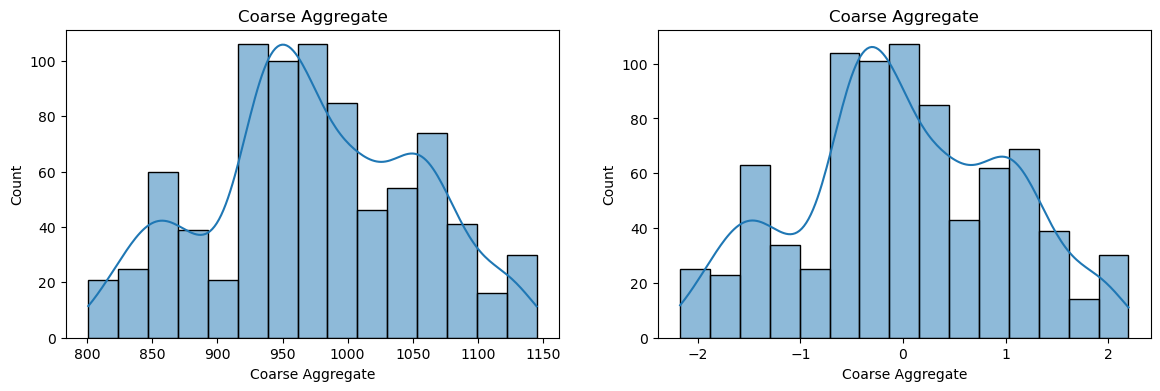

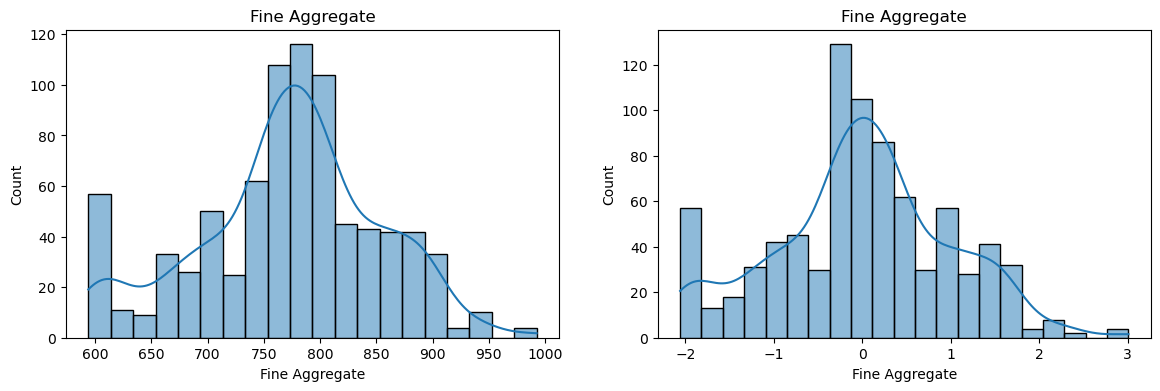

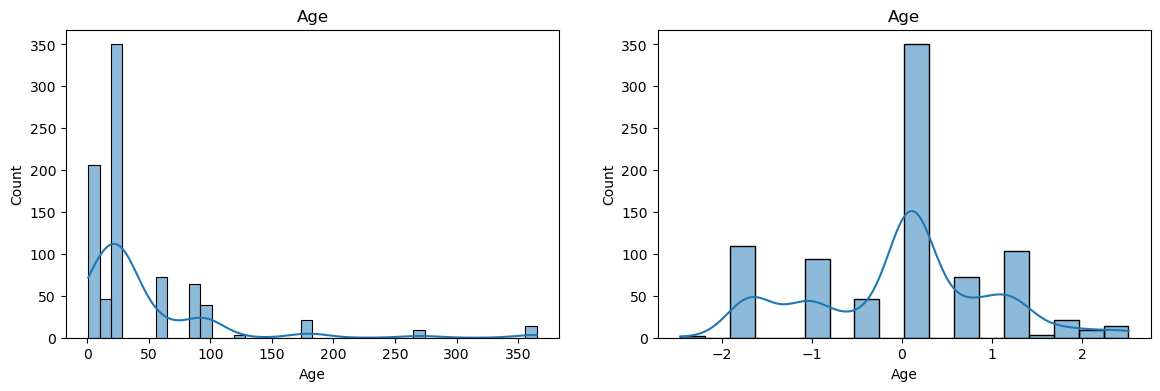

In [52]:
# before and after the box-cox transform
# compare the graphs

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed[col], kde=True)
    plt.title(col)

    plt.show()

Age is proabably the one which imporved the most after the Transform

### Apply Yeo-Johnson Transform

In [53]:
pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)

y_pred3 = lr.predict(x_test_transformed2)
print(r2_score(y_test, y_pred3))
# print accuracy

pd.DataFrame({'cols': x_train.columns, 'Yeo_Johnson_Lambdas': pt1.lambdas_})
# the input is a Dictionary

0.8153845515001843


,cols,Yeo_Johnson_Lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [54]:
# apply cross val score
pt1 = PowerTransformer()
x_transformed2 = pt1.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed2, y, scoring='r2'))

0.6834625134285746

In [55]:
# covert the numpy array into a dataframe
x_train_transformed2 = pd.DataFrame(x_train_transformed2, columns=x_train.columns)

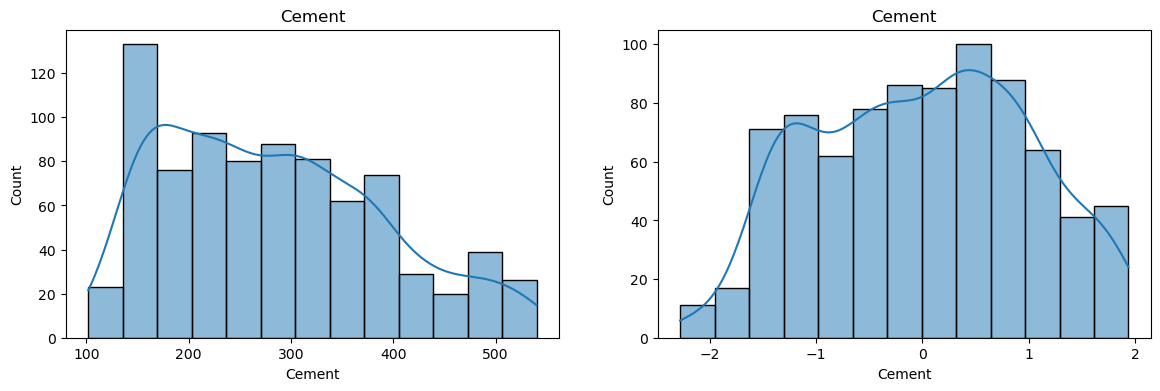

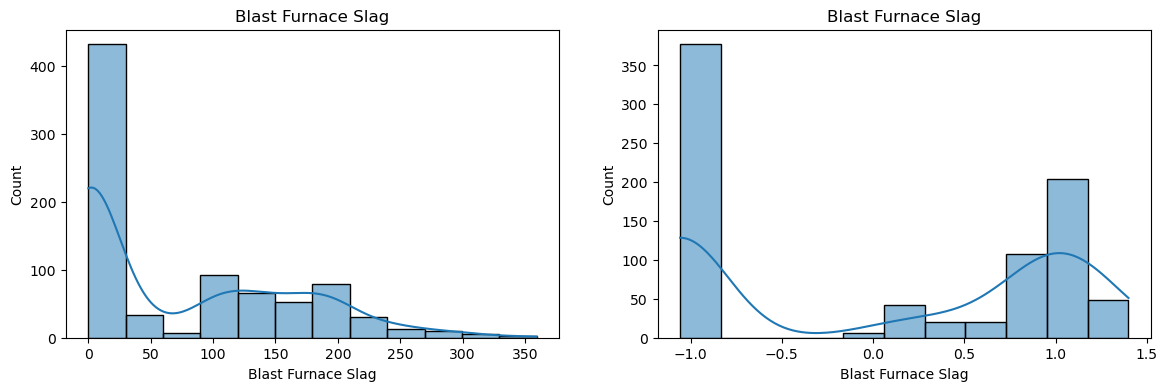

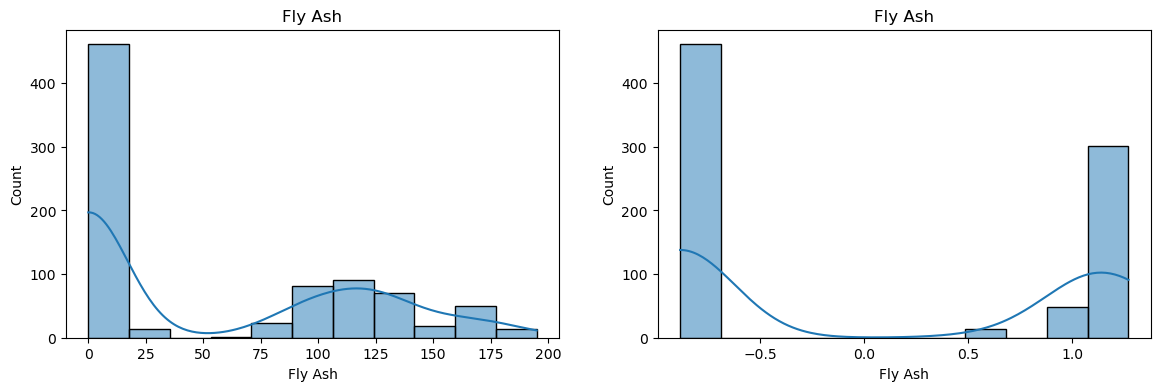

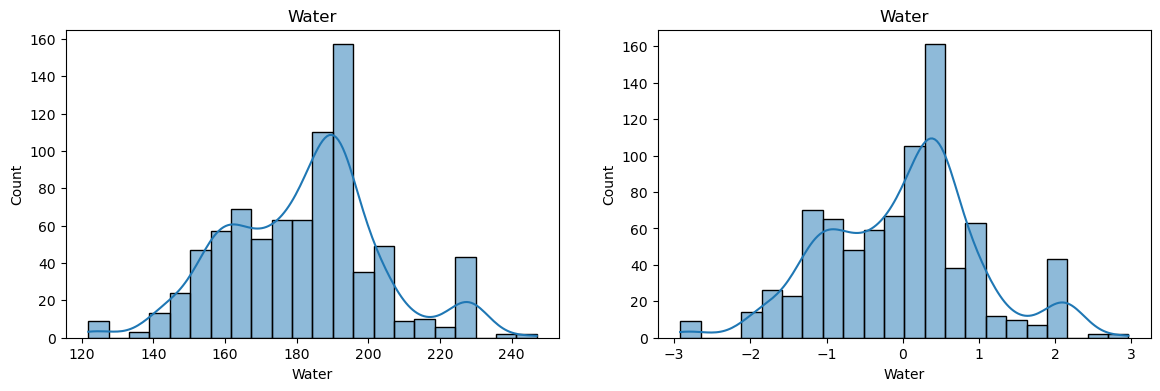

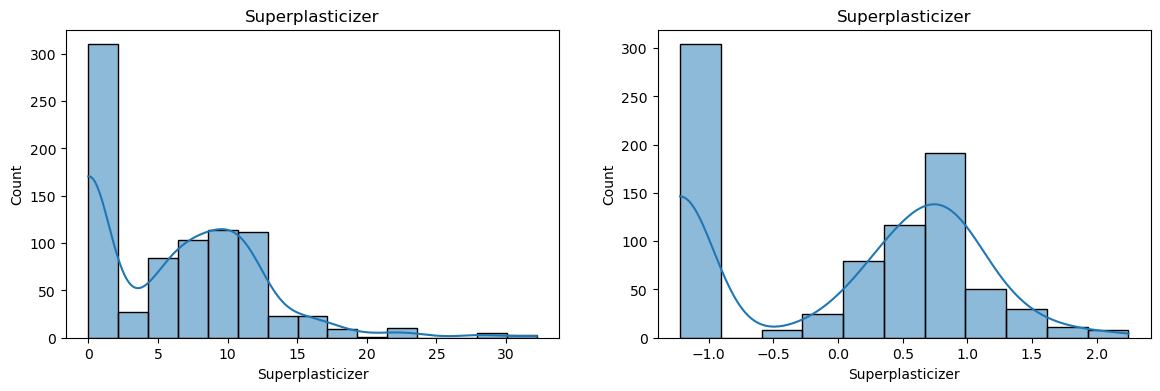

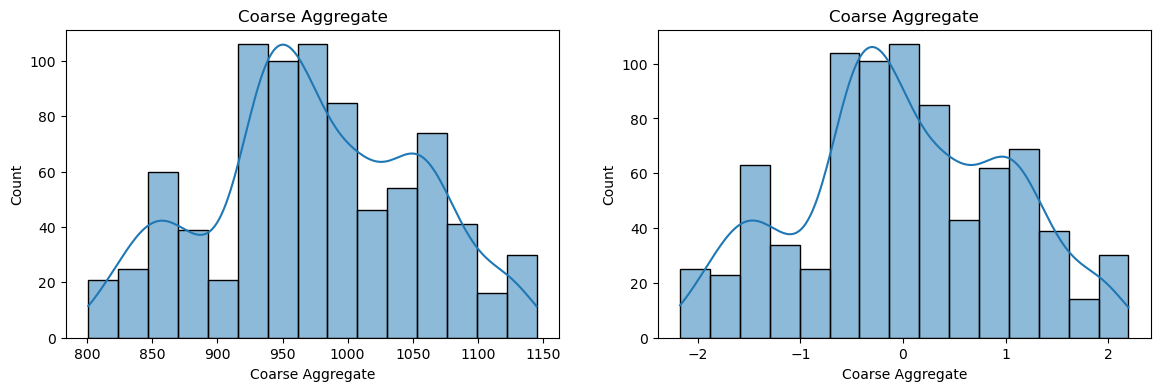

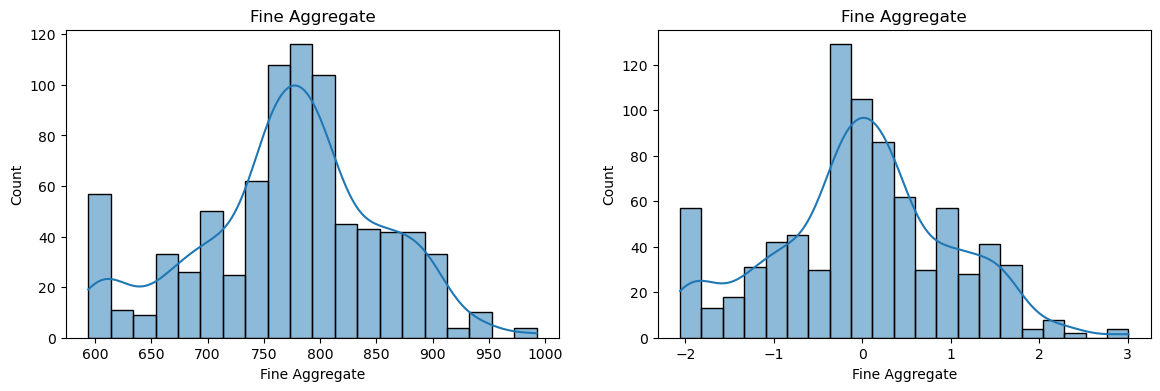

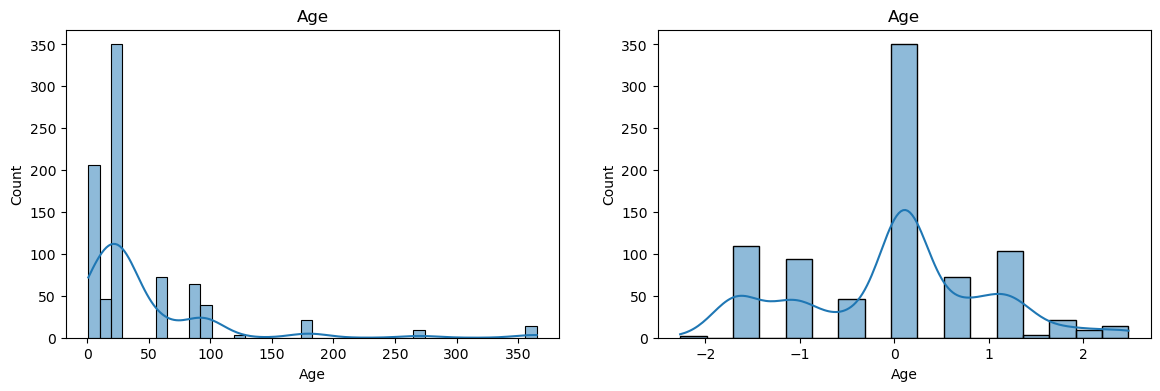

In [56]:
# before and after Jeo-Johnson Transform
for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed2[col], kde=True)
    plt.title(col)

    plt.show()

In [65]:
# side by side comparision of both Transform
pd.DataFrame({'cols':x_train.columns,'Box_Cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Box_Cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.215602,0.169544
1,Blast Furnace Slag,0.023556,0.016633
2,Fly Ash,-0.005774,-0.136480
3,Water,0.959062,0.808438
4,Superplasticizer,0.091027,0.264160
5,Coarse Aggregate,1.192491,1.129395
6,Fine Aggregate,1.973781,1.830763
7,Age,-0.014692,0.001771
